In [6]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [7]:
resource_path = os.getcwd() + "/resource/"
img = cv2.imread(resource_path + "sIMG_8253.jpg")

8668.5
7384.5
8349.0
3431.0


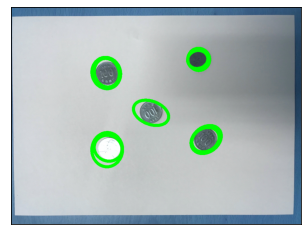

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (19, 19), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 3, 1)

kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 19)

cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 10000:
        continue
    count = count + 1
    print(area)
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 10)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img)
plt.xticks([]),plt.yticks([])
plt.show()